<center>
    <h2>
        Visualizing Dog Rating Data
    </h2>
</center>
   


In this report, we will take a look at a database of dog ratings and try to answer some questions about it. The data we are concerned with belongs to a Twitter account called 'WeRateDogs' that rates images of dogs (usually in an absurd manner where the rating is greater than 1.

The data contained information about each tweet made by the account such as: `tweet id`, `tweet text`, `rating numerator`, `rating denominator`, `favorite count`, `retweet count`, `image url` (image of the dog), `name`, `time` and `date` (date and time of the posting of the tweet).

After dividing the numerator by the denominator, we were able to visualize the distribution of the rating values. As shown below, most of the rating is above 1.


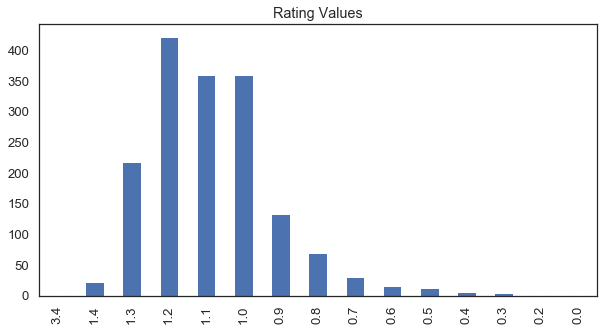

In [247]:
df_main['rating'] = round(df_main['numerator'] / df_main['denominator'], 1) # rounding to the nearest tenth to have a smooth curve
df_main.rating.value_counts().sort_index(ascending=False).plot(kind='bar',figsize=[10,5]);
plt.title('Rating Values');

The rating system seems strange, so it was natural to ask: 'do other people agree with this rating?'. To answer the question, we can compare the rating with the favorite and retweet counts.

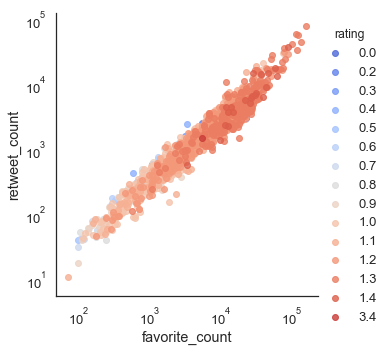

In [249]:
# Question do people agree with these ratings?
sns.lmplot(x='favorite_count',y='retweet_count',data=df_main,hue='rating',fit_reg=False, palette='coolwarm');
plt.xscale('log');
plt.yscale('log');

Clearly, higher ratings get higher retweet and favorite counts. It does seem that even though the rating system is strange, many people agree with it.

Finally, it was time to create a regression system to try to predict certain parameters. Unfortunatley, it wasn't possible to predict the rating data from the parameters we have. However, a prediction can be made between the retweet count and the favorite count as follows:

$$ favorite count = 2.58 \times retweet count + 2156.3242 $$